In [5]:
import pandas as pd
import random

main40 = pd.read_excel("wordlist.xlsx")
main100 = pd.read_excel("fullwordlist.xlsx")

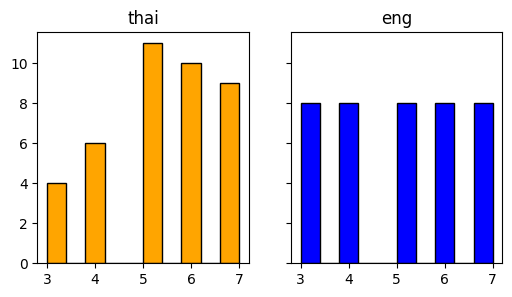

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

def histochecker(df, mode):
    awo = [len(df.loc[i,'th']) for i in range(0,len(df.index))]
    awa = [len(df.loc[i,'en']) for i in range(0,len(df.index))]

    if mode == "plotter":
        fig, axs = plt.subplots(1, 2, figsize=(6, 3), sharey=True)
        axs[0].hist(awo, color = "orange",edgecolor = "black")
        axs[0].set_title("thai")
        axs[1].hist(awa, color = "blue",edgecolor = "black")
        axs[1].set_title("eng")

    elif mode == "variant": # return p value of the current th langauge uniform distribution, the higher the p, the more it uniformly disttributed
        num_bins = 12
        bins = np.linspace(2,14,num_bins + 1)

        # Get observed frequencies
        observed, _ = np.histogram(awo, bins=bins)

        # Expected frequency per bin assuming uniform distribution
        expected = np.full(num_bins, len(awo) / num_bins)

        # Perform Chi-Square Test
        chi2_stat, p_value = stats.chisquare(observed, expected)

        # Print results
        # print(f"Chi-Square Statistic: {chi2_stat:.4f}")
        # print(f"P-value: {p_value:.4f}")
        return p_value
    
    # print("seed =",seed)
    

histochecker(main40, "plotter")

In [7]:
illegal = [2,4,5,25,29,43,47,49,65,67,69,74,77,85,90,91,92,99,100]

removal = main100

removal = removal[~removal['imgid'].isin(main40["imgid"].tolist())]
removal = removal[~removal['imgid'].isin(illegal)]

In [ ]:
ptop = 0.9210948888374612
seed = 164957292   

for i in range(0,1):
    valie = random.randint(0,999999999)
    removalsamp = removal.sample(20, random_state = valie).reset_index(drop=True)
    p = histochecker(removalsamp, "variant")
    if p > ptop:
        ptop = p
        print("seed", valie, "outrun", seed,"!, with p =",p)
        seed = valie

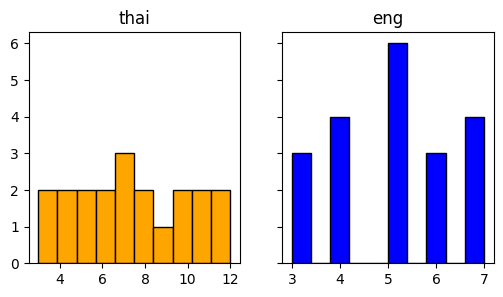

In [9]:

removalsamp = removal.sample(20, random_state = 164957292).reset_index(drop=True)
histochecker(removalsamp, "plotter")

    


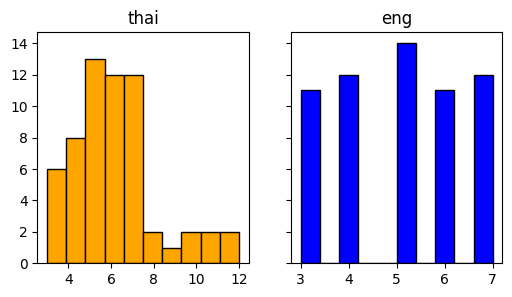

In [16]:
rawdata = pd.concat([removalsamp, main40], ignore_index=True)
# rawdata['th'].duplicated()

# rawdata file is used to reference what was represented, note that making a full list of
# file that include both image and text is impossible, I mean, who would add image in excel?
# either you are dumb or stupid, or both, whatever
histochecker(rawdata,"plotter")

rawdata.to_excel("allthisshit.xlsx", index=None)

In [11]:
# create order list

# wordid is predefined
wordid = rawdata['imgid'].tolist()

# define lang 1 = th, 2 = en
lang = [1,2]

# image id, 0 = incorrect, 1 = correct
truestate = [0,1]


imgorderth = pd.DataFrame([[1, n, p]  for n in wordid for p in truestate], columns = ["lang", "wordid", "truestate"])
imgorderen = pd.DataFrame([[2, n, p]  for n in wordid for p in truestate], columns = ["lang", "wordid", "truestate"])


In [12]:
# add word and img dir,  word[lang][id][type] and img[state][id]
def word_n_imgdir_rmaker(df):
    for rowid in range(0, len(df.index)):
        wordid = df.loc[rowid, "wordid"]
        if df.loc[rowid,"lang"] == 1:
            df.loc[rowid,"worddir"] = f"word/wordth{wordid:03}1.png"
        else:
            df.loc[rowid,"worddir"] = f"word/worden{wordid:03}1.png"

    for rowid in range(0, len(df.index)):
        wordid = df.loc[rowid, "wordid"]
        if df.loc[rowid, "truestate"] == 0:
            df.loc[rowid,"imgdir"] = f"image/False/mgf{wordid:02}.png"
        else:
            df.loc[rowid, "imgdir"] = f"image/True/img{wordid:02}.png"


word_n_imgdir_rmaker(imgorderth)
word_n_imgdir_rmaker(imgorderen)

In [13]:
# export the file for running only
# start with en dataframe --> repeat --> randomize --> export
import random
random.seed(69) # to control every repeat

def con_n_ran(df, name):
    rep = pd.concat([df, df], ignore_index=True)
    full = rep.sample(frac=1)
    full.to_excel(name, index=None)

con_n_ran(imgorderen, "enimgorder.xlsx")
con_n_ran(imgorderth, "thimgorder.xlsx")

# if merge both of them, need to write a new one
rep = pd.concat([imgorderth, imgorderen], ignore_index=True)

# and repeat one more time
reprep = pd.concat([rep, rep], ignore_index=True)
repsam = reprep.sample(frac=1)

repsam.to_excel("fullwordorder.xlsx", index=None)